# 目录
70. 以5个数据作为一个数据滑动窗口，在这个5个数据上取均值（收盘价）
71. 将收盘价5日均线、20日均线与原始数据绘制在同一张图上
72. 按周为采样规则，取一周收盘价最大值
73. 绘制重采样数据与原始数据
74. 将数据往后移动5天
75. 将数据向前移动5天
76. 使用expending函数计算开盘价的移动窗口均值
77. 绘制上一题的移动均值与原始数据折线图
78. 计算布林指标
79. 计算布林线并绘制

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"] = False # 该语句解决图像中的“-”负号的乱码问题
data = pd.read_excel(r"C:\Users\Monty _L\Documents\GitHub\Mathematical-modeling\learn\数据分析\demo3.xlsx")
data

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
1,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11
2,600002.SH,浦发银行,2016-01-06,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,8.386674e+08,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11
3,600003.SH,浦发银行,2016-01-07,15.9855,15.8088,15.8088,15.3672,15.4644,11350479.0,1.995027e+08,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11
4,600004.SH,浦发银行,2016-01-08,15.4544,15.6675,15.7912,14.9345,15.4467,71918296.0,1.262105e+09,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,数据来源,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 70. 以5个数据作为一个数据滑动窗口，在这个5个数据上取均值（收盘价）
data['收盘价'].rolling(5).mean()

0         NaN
1         NaN
2         NaN
3         NaN
4    15.69578
5         NaN
6         NaN
Name: 收盘价, dtype: float64

<AxesSubplot:>

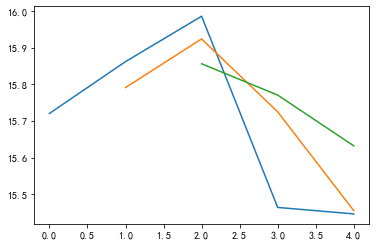

In [7]:
# 71. 将收盘价5日均线、20日均线与原始数据绘制在同一张图上
data['收盘价'].plot()
data['收盘价'].rolling(2).mean().plot()
data['收盘价'].rolling(3).mean().plot()

In [8]:
# 72. 按周为采样规则，取一周收盘价最大值
# 报错信息大概是因为数据太少了
data['收盘价'].resample('W').max()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

ValueError: Invalid frequency: 70

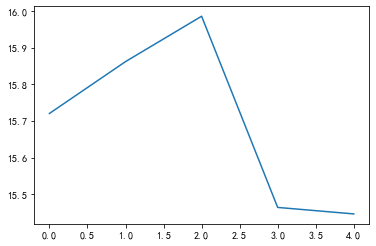

In [9]:
# 73. 绘制重采样数据与原始数据
data['收盘价'].plot()
data['收盘价'].resample('70').max().plot()

In [10]:
# 74. 将数据往后移动5天
data.shift((5))

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
6,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11


In [11]:
# 75. 将数据向前移动5天
data.shift((-5))

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,数据来源,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
